1)Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

a)On average, which manufacturer has the best miles per gallon?
b)How many different manufacturers are there?
c)How many different models are there?
d)Do automatic or manual cars have better miles per gallon?

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from pydataset import data
import pandas as pd
mpg=data("mpg")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [11]:
mpg['avg_mpg']=(mpg.cty+mpg.hwy)/2
mpg.groupby('manufacturer')['avg_mpg'].mean().sort_values(ascending=False)
#Honda is the manufacturer with the best overall mpg.

manufacturer
honda         28.500000
volkswagen    25.074074
hyundai       22.750000
subaru        22.428571
audi          22.027778
toyota        21.720588
pontiac       21.700000
nissan        21.346154
chevrolet     18.447368
ford          16.680000
mercury       15.625000
jeep          15.562500
dodge         15.540541
lincoln       14.166667
land rover    14.000000
Name: avg_mpg, dtype: float64

In [14]:
#There are 15 different manufacturers
len(mpg.manufacturer.unique())

15

In [18]:
#There are 38 unique models.
len(mpg.model.unique())

38

In [22]:
#cleanining up the auto/manual columns for 1d
mpg['trans_fix']=mpg['trans'].str.split("(").apply(lambda x: x[0])
#mpg['trans'].apply(lambda x: 'auto' if 'auto' in x else 'manual')
#def fix_trans(trans_string):
#    if 'auto' in trans_string:
#        return 'auto'
#    else:
#        return 'manual'
#mpg.trans.apply(fix_trans)

In [24]:
#Manual transmissions have better mpg on average
mpg.groupby('trans_fix')['avg_mpg'].mean()

trans_fix
auto      19.130573
manual    22.227273
Name: avg_mpg, dtype: float64

2)Copy the users and roles dataframes from the examples above. What do you think a right join would look like? An outer join? 
What happens if you drop the foreign keys from the dataframes and try to merge them?

3)Getting data from SQL databases

a)Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.
Use your function to obtain a connection to the employees database.
b)Once you have successfully run a query:
ci)Intentionally make a typo in the database url. What kind of error message do you see?
cii)Intentionally make an error in your SQL query. What does the error message look like?
d)Read the employees and titles tables into two separate dataframes
e)Visualize the number of employees with each title.
f)Join the employees and titles dataframes together.
g)Visualize how frequently employees change titles.
h)For each title, find the hire date of the employee that was hired most recently with that title.
i)Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [42]:
from env import host, user, password
import pandas as pd
def get_db_url(db_name):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    return url

url=get_db_url('employees')
employees=pd.read_sql('''SELECT * FROM employees''',url)
titles=pd.read_sql('''SELECT * FROM titles''',url)

In [43]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [44]:
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


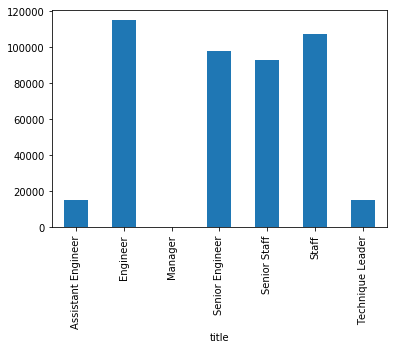

In [35]:
titles.groupby('title')['title'].count().plot.bar()
plt.show()

In [36]:
titles['to_date']=pd.to_datetime(titles['to_date'], errors = 'coerce')
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,NaT
1,10002,Staff,1996-08-03,NaT
2,10003,Senior Engineer,1995-12-03,NaT
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,NaT


In [36]:
#f)Join the employees and titles dataframes together.
combined=employees.merge(titles,how='inner',on='emp_no')
combined.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,NaT
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,NaT
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,NaT
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,NaT


In [43]:
combined.loc[combined.to_date.isnull(),['to_date']]='2019-09-26'

In [46]:
combined.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,2019-09-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,2019-09-26
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,2019-09-26
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01 00:00:00
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,2019-09-26


In [47]:
combined[combined.to_date=='2019-09-26']

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,2019-09-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,2019-09-26
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,2019-09-26
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,2019-09-26
5,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Senior Staff,1996-09-12,2019-09-26
7,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer,1990-08-05,2019-09-26
8,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,Senior Staff,1996-02-11,2019-09-26
13,10009,1952-04-19,Sumant,Peac,F,1985-02-18,Senior Engineer,1995-02-18,2019-09-26
14,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,Engineer,1996-11-24,2019-09-26
17,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,Senior Engineer,2000-12-18,2019-09-26


4)Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

What is the total price for each order?
What are the most popular 3 items?
Which item has produced the most revenue?

In [45]:
url=get_db_url('chipotle')
orders=pd.read_sql('''SELECT * FROM orders''',url)

In [46]:
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
